<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [14]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'
fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')

In [15]:
# visualize os resultados
print(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [16]:
# manipule os dados

#extraindo os estados do arquivo
estados_extraidos = list()
for linha in fonte.find_all('nome'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  estados_extraidos.append(texto_coluna)
#extraindo a sigla do estado
sigla_extraidos = list()
for linha in fonte.find_all('sigla'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  sigla_extraidos.append(texto_coluna)
#extraindo a regiao dos estados
regiao_extraida = list()
for linha in fonte.find_all('regiao'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  regiao_extraida.append(texto_coluna)


estados = list()
for itens in estados_extraidos:
  estados.append(itens[0])

sigla_estado = list()
for itens in sigla_extraidos:
  sigla_estado.append(itens[0])

regiao_estado = list()
for itens in regiao_extraida:
  regiao_estado.append(itens[0])

In [17]:
#salvando os dados em um arquivo csv separado por ';'
import csv
with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado', 'sigla', 'regiao']] + list(map(lambda estado, sigla, regiao: [estado, sigla, regiao], estados, sigla_estado, regiao_estado)))


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [18]:
from pickleshare import PickleShareDB
estado = None
cidades = None
populacao = None
pib = None
pib_percapita = None

with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('UF')
  saldos = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)

  indice_saldo = cabecalho.index('nome')
  saldos2 = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('Pop_est_2009')
  populacao = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('PIB')
  pib = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('PIB_percapita')
  pib_percapita = [linha[indice_saldo] for linha in leitor_csv_iter]

print(saldos)
print(saldos2)
print(populacao)
print(pib)
print(pib_percapita)

['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ', 'MINAS GERAIS', 'PIAUÍ', 'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'PERNAMBUCO', 'RIO GRANDE DO SUL', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS', 'MINAS GERAIS', 'PARAÍBA', 'AMAZONAS', 'TOCANTINS', 'SÃO PAULO', 'SANTA CATARINA', 'MINAS GERAIS', 'MINAS GERAIS', 'BAHIA', 'CEARÁ', 'RORAIMA', 'RIO GRANDE DO SUL', 'PERNAMBUCO', 'PIAUÍ', 'MARANHÃO', 'RIO DE JANEIRO', 'MINAS GERAIS', 'RIO GRANDE DO SUL', 'PERNAMBUCO', 'BAHIA', 'PARAÍBA', 'PARAÍBA', 'MATO GROSSO', 'MINAS GERAIS', 'PARÁ', 'BAHIA', 'PIAUÍ', 'GOIÁS', 'PARAÍBA', 'BAHIA', 'TOCANTINS', 'MINAS GERAIS', 'TOCANTINS', 'PARAÍBA', 'SÃO PAULO', 'RIO GRANDE DO SUL', 'PARANÁ', 'BAHIA', 'SANTA CATARINA', 'PARÁ', 'BAHIA', 'PERNAMBUCO', 'SERGIPE', 'PARANÁ', 'MATO GROSSO', 'PARAÍBA', 'MATO GROSSO', 'MARANHÃO', 'SÃO PAULO', 'GOIÁS', 'PARAÍBA', 'PERNAMBUCO', 'ALAGOAS', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'MATO GROSSO', 'PARÁ', 'RIO DE JANEIRO', 'ALAGOAS', 'CEARÁ', 'BAHIA

In [19]:
import csv
with open(file='./cidades-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']] + list(map(lambda estado, cidade, populacao, pib, pib_percapita: [estado, cidade, populacao, pib, pib_percapita], saldos, saldos2, populacao, pib, pib_percapita)))

In [20]:
import pandas as pd

cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')


In [21]:
cidades_df.head(n=10)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
5,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195
6,PIAUÍ,Teresina,802537,8.700461e+06,10841.200195
7,PIAUÍ,Amarante,17892,6.532289e+04,3650.949951
8,GOIÁS,Matrinchã,4420,4.591055e+04,10387.000000
9,PERNAMBUCO,Cachoeirinha,18123,8.043380e+04,4438.220215


In [22]:
cidades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         363 non-null    object 
 1   cidade         363 non-null    object 
 2   populacao      363 non-null    int64  
 3   pib            363 non-null    float64
 4   pib_percapita  363 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [23]:
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')

In [24]:
estados_df.head()

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [25]:
pd.concat([cidades_df[['estado']], estados_df[['estado']]])

,estado
0,BAHIA
1,RIO GRANDE DO SUL
2,ESPIRITO SANTO
3,MINAS GERAIS
4,PIAUÍ
...,...
22,SANTA CATARINA
23,SAO PAULO
24,SERGIPE
25,TOCANTINS


In [26]:
brasil_csv = pd.merge(left=cidades_df, right=estados_df, on='estado', how='outer')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [27]:
brasil_csv.to_csv('brasil.csv')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [28]:
brasil_csv.nlargest(10, 'populacao')[['cidade', 'populacao']]

,cidade,populacao
261,Manaus,1738641.0
122,Teresina,802537.0
24,Feira de Santana,591707.0
59,Serra,404688.0
116,Ribeirão das Neves,349307.0
58,Vitória,320156.0
189,Guarujá,308058.0
166,Petrolina,281851.0
194,Itapevi,205881.0
175,Marabá,203049.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [29]:
df_nordeste = (brasil_csv.loc[brasil_csv['regiao'] == 'NORDESTE'])
df_nordeste.nsmallest(5, ['pib_percapita'])[['cidade', 'pib_percapita']]

,cidade,pib_percapita
13,Nordestina,2798.449951
29,Mulungu do Morro,2869.510010
1,Maetinga,2988.129883
10,Nova Redenção,3102.550049
339,Dois Riachos,3131.989990


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [30]:
df_saopaulo = (brasil_csv.loc[brasil_csv['estado'] == 'SÃO PAULO'])
df_saopaulo.nlargest(15, ['pib'])[['cidade', 'pib']]

,cidade,pib
193,Araraquara,4.193535e+06
198,Sertãozinho,4.155644e+06
194,Itapevi,3.638207e+06
189,Guarujá,3.429098e+06
216,Valinhos,3.042457e+06
206,Leme,1.338844e+06
200,Caraguatatuba,1.147378e+06
187,Itapeva,1.120700e+06
218,Fernandópolis,9.780061e+05
209,Promissão,7.715853e+05


 - Qual é o PIB do estado de Santa Catarina?

In [31]:
df_sc = (brasil_csv.loc[brasil_csv['estado'] == 'SANTA CATARINA'])
soma = df_sc['pib'].sum()
display(soma)

3678999.37304687

 - Qual é o população da região sul?

In [32]:
df_populacao_sul = (brasil_csv.loc[brasil_csv['regiao'] == 'SUL'])
soma_populacao = df_populacao_sul['populacao'].sum()
display(f'A populacaço da regiao sul é de {soma_populacao}')

'A populacaço da regiao sul é de 506039.0'

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [33]:
pib_ms = (brasil_csv.loc[brasil_csv['estado'] == 'MATO GROSSO DO SUL'])
pib_medio = pib_ms['pib_percapita'].sum() / 8
print(pib_medio)

6931.99255371


 - Qual é a população do Brasil?

In [34]:
populacao_brasil = brasil_csv['populacao'].sum()
display(populacao_brasil)

12111834.0

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

In [35]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='populacao', ylabel='cidade'>

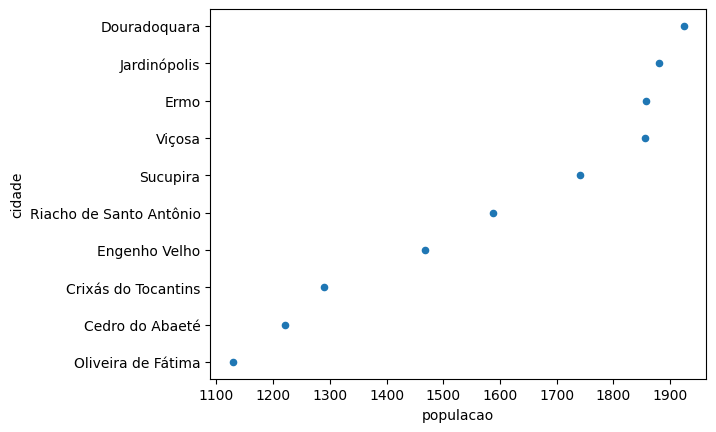

In [36]:
cidades_min = brasil_csv.nsmallest(10, 'populacao')[['cidade', 'populacao']]
cidades_min.plot.scatter(x='populacao', y='cidade', colormap='viridis')


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

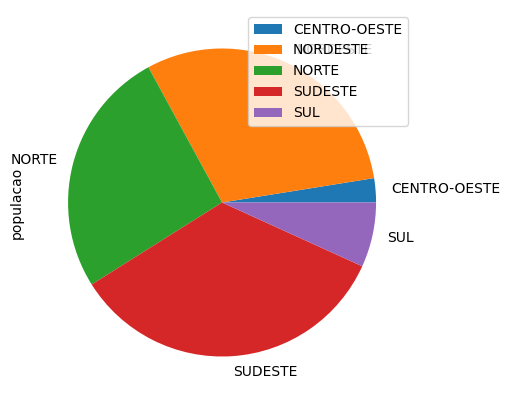

In [37]:
brasil_csv[['regiao', 'populacao']].groupby('regiao').agg('sum').plot.pie(y='populacao', figsize=(5,5))